# **Weather parameters forecasting using Machine Learning models, Temperature**

# **1. Getting the Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
weather_data= pd.DataFrame(pd.read_excel("perdaydata.xlsx"))
weather_data.head(15)

,Date/time,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati,Rain
0,2007-01-01,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0,0.0
1,2007-01-02,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0,0.0
2,2007-01-03,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0,0.0
3,2007-01-04,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0,0.0
4,2007-01-05,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0,0.0
5,2007-01-06,10.1,30.2,18.6,37.0,100,75.0,34500.0,0.0,0.0
6,2007-01-07,8.6,29.6,18.0,42.0,100,79.0,31500.0,0.0,0.0
7,2007-01-08,9.3,29.4,18.2,46.0,100,80.0,26100.0,0.0,0.0
8,2007-01-09,8.8,30.9,18.6,39.0,100,77.0,22800.0,0.0,0.0
9,2007-01-10,8.5,31.3,18.4,39.0,100,78.0,22500.0,0.0,0.0


# **2. Plotting the Graphs**

<AxesSubplot:ylabel='Frequency'>

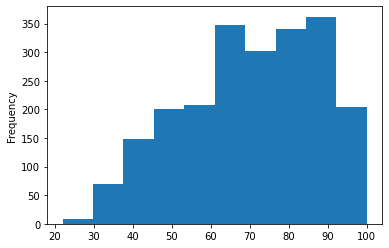

In [2]:
weather_data["Rel.Hum mean"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

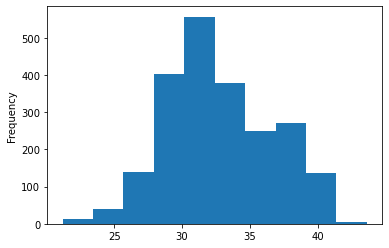

In [3]:
weather_data["Airtemp max"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

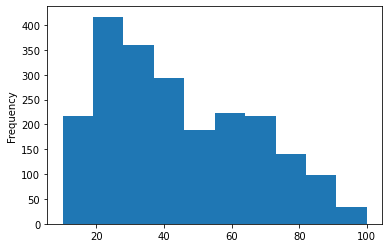

In [4]:
weather_data["Rel.Hum min"].plot.hist()

# **3. Finding the Null values**

In [5]:
weather_data.isnull()

,Date/time,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati,Rain
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2187,False,False,False,False,False,False,False,False,False,False
2188,False,False,False,False,False,False,False,False,False,False
2189,False,False,False,False,False,False,False,False,False,False
2190,False,False,False,False,False,False,False,False,False,False


In [6]:
weather_data.isnull().sum()

Date/time             0
Airtemp min           0
Airtemp max           0
Airtemp mean          0
Rel.Hum min           0
Rel.Hum max           0
Rel.Hum mean          0
Day length durati     0
LeafWetness durati    0
Rain                  0
dtype: int64

# **5. Droping the values**

In [7]:
weather_data.drop("Date/time", axis=1, inplace=True)
weather_data.head()

,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati,Rain
0,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0,0.0
1,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0,0.0
2,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0,0.0
3,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0,0.0
4,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0,0.0


In [8]:
X=weather_data.drop("Rel.Hum mean",axis=1)
y=weather_data["Rel.Hum mean"].values
y

array([76., 75., 77., ..., 70., 77., 79.])

In [9]:
y

array([76., 75., 77., ..., 70., 77., 79.])

# **7. Train and Test**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1,random_state=15)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## // Decision tree and adaboost regressor

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)   # number of methods for generating random numbers 
regr_1 = DecisionTreeRegressor(max_depth=4)   # maximum depth of the tree

# 299 boosts (300 decision trees) is compared with a single decision tree regressor. As the number of boosts is increased the regressor can fit more detail
regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1d = regr_1.predict(X_train)
y_2d = regr_1.predict(X_test)

y_1ad = regr_1.predict(X_train)
y_2ad = regr_2.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error as mse

In [14]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1d), mse(y_test, y_2d)))

from math import sqrt
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1d)), sqrt( mse(y_test, y_2d)) ))

from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1d), mae(y_test, y_2d)))

import sklearn.metrics as metrics
r1_sk = metrics.r2_score(y_train,y_1d)
r2_sk = metrics.r2_score(y_test,y_2d)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 13.091330657139244
Mean Squared error on test data --> 14.290180642387602
root Mean Squared error on training data --> 3.61819439183956
 root Mean Squared error on test data --> 3.7802355273696375
Mean absolute error on training data --> 2.815656188875128
Mean absolute error on test data --> 2.9289141615056318
R-Squared: 0.9566862421084449


In [15]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_1ad), mse(y_test, y_2ad)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, y_1ad)), sqrt( mse(y_test, y_2ad))))  
                                                                                                            
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, y_1ad), mae(y_test, y_2ad)))
                                                                                            
r1_skmax = metrics.r2_score(y_train,y_1ad)
r2_skmax = metrics.r2_score(y_test,y_2ad)
print("R-Squared:", r1_skmax)

Mean Squared error on training data --> 13.091330657139244
Mean Squared error on test data --> 8.583271218832033
root Mean Squared error on training data --> 3.61819439183956
 root Mean Squared error on test data --> 2.9297220378104187
Mean absolute error on training data --> 2.815656188875128
Mean absolute error on test data --> 2.3856113091761797
R-Squared: 0.9566862421084449


## using linear regression

In [16]:
from sklearn.linear_model import LinearRegression as lr
lrr = lr().fit(X_train,y_train)

In [17]:
predlrtest = lrr.predict(X_test)
predlrtrain = lrr.predict(X_train)

In [18]:
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, predlrtrain)), sqrt( mse(y_test, predlrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, predlrtrain), mae(y_test, predlrtest)))

print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, predlrtrain), mse(y_test, predlrtest)))

r1_sk = metrics.r2_score(y_train,predlrtrain)
r2_sk = metrics.r2_score(y_test,predlrtest)
print("R-Squared:", r1_sk)


root Mean Squared error on training data --> 2.497462824518582
 root Mean Squared error on test data --> 2.4128859007650227
Mean absolute error on training data --> 1.8790358135266678
Mean absolute error on test data --> 1.8893415124496757
Mean Squared error on training data --> 6.237320559852333
Mean Squared error on test data --> 5.8220183701106345
R-Squared: 0.9793633054043951


In [19]:
todaytemp = lrr.predict(X_test[5].reshape(1,-1))
print(todaytemp)

[73.34437075]


## Ridge regression

In [20]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf = clf.fit(X_train, y_train)
Ridge()

Ridge()

In [21]:
clftrain = clf.predict(X_train)
clftest = clf.predict(X_test)

In [22]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))


print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

r1_sk = metrics.r2_score(y_train,clftrain)
r2_sk = metrics.r2_score(y_test,clftest)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 7.1651677408588474
Mean Squared error on test data --> 6.950831316493955
root Mean Squared error on training data --> 2.676783095594196
 root Mean Squared error on test data --> 2.6364429287382563
Mean absolute error on training data --> 2.0580787745733495
Mean absolute error on test data --> 2.134196632307134
R-Squared: 0.9762934457231287


In [23]:
today = X_test[10].reshape(1,-1);
todaytemp = clf.predict(today)
print(todaytemp)

[72.04064493]


## MLP regressor

In [24]:
from sklearn.neural_network import MLPRegressor as mlp
mlp = mlp(random_state=1, max_iter=2000).fit(X_train, y_train)

In [25]:
mlptrain = mlp.predict(X_train)
mlptest = mlp.predict(X_test)

In [26]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, clftrain), mse(y_test, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, clftrain)), sqrt( mse(y_test, clftest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, clftrain), mae(y_test, clftest)))

r1_sk = metrics.r2_score(y_train,mlptrain)
r2_sk = metrics.r2_score(y_test,mlptest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 7.1651677408588474
Mean Squared error on test data --> 6.950831316493955
root Mean Squared error on training data --> 2.676783095594196
 root Mean Squared error on test data --> 2.6364429287382563
Mean absolute error on training data --> 2.0580787745733495
Mean absolute error on test data --> 2.134196632307134
R-Squared: 0.9852777140448883


In [27]:
today = X_test[7].reshape(1,-1)
todaytemp = mlp.predict(today)
print(todaytemp)

[73.34828201]


## lasso regression

In [28]:
from sklearn import linear_model as lm
lms = lm.Lasso(alpha=0.1).fit(X_train, y_train)

In [29]:
lmstrain = lms.predict(X_train)
lmstest = lms.predict(X_test)

In [30]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, lmstrain), mse(y_test, lmstest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, lmstrain)), sqrt( mse(y_test, lmstest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, lmstrain), mae(y_test, lmstest)))

r1_sk = metrics.r2_score(y_train,lmstrain)
r2_sk = metrics.r2_score(y_test,lmstest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 10.797844771430869
Mean Squared error on test data --> 11.26918749237906
root Mean Squared error on training data --> 3.2860074210857877
 root Mean Squared error on test data --> 3.356961050173067
Mean absolute error on training data --> 2.5619475938460923
Mean absolute error on test data --> 2.6832905791200945
R-Squared: 0.9642744311919662


In [31]:
today = X_test[6].reshape(1,-1)
todaytemp = lms.predict(today)
print(todaytemp)

[59.33554957]


## random forest regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor as rfr
regr = rfr(max_depth=2, random_state=0)
regrn = regr.fit(X_train, y_train)

In [33]:
rfrtrain = regrn.predict(X_train)
rfrtest = regrn.predict(X_test)

In [34]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, rfrtrain), mse(y_test, rfrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, rfrtrain)), sqrt( mse(y_test, rfrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, rfrtrain), mae(y_test, rfrtest)))

r1_sk = metrics.r2_score(y_train,rfrtrain)
r2_sk = metrics.r2_score(y_test,rfrtest)
print("R-Squared:", r1_sk)



Mean Squared error on training data --> 37.27400115234919
Mean Squared error on test data --> 36.951214261174385
root Mean Squared error on training data --> 6.105243742255439
 root Mean Squared error on test data --> 6.078751044513535
Mean absolute error on training data --> 4.862857274249929
Mean absolute error on test data --> 4.823742588827879
R-Squared: 0.8766758625348786


In [35]:
today = X_test[6].reshape(1,-1)
todaytemp = regrn.predict(today)
print(todaytemp)

[62.60433471]


## KNeighborsRegressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor as knr
neigh = knr(n_neighbors=2)
knrn = neigh.fit(X_train, y_train)

In [37]:
knrtrain = knrn.predict(X_train)
knrtest = knrn.predict(X_test)

In [38]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, knrtrain), mse(y_test, knrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, knrtrain)), sqrt( mse(y_test, knrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, knrtrain), mae(y_test, knrtest)))

r1_sk = metrics.r2_score(y_train,knrtrain)
r2_sk = metrics.r2_score(y_test,knrtest)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 2.942680654158215
Mean Squared error on test data --> 11.516991477272727
root Mean Squared error on training data --> 1.7154243364713626
 root Mean Squared error on test data --> 3.3936693235011464
Mean absolute error on training data --> 1.2516734279918864
Mean absolute error on test data --> 2.359204545454545
R-Squared: 0.9902638959518708


In [39]:
today = X_test[6].reshape(1,-1)
todaytemp = knrn.predict(today)
print(todaytemp)

[62.5]


## SVM linera SVR

In [40]:
from sklearn.svm import LinearSVR as svm
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import StandardScaler
regr = mp(StandardScaler(), svm(random_state=0, tol=2e-5))
svmn = regr.fit(X_train, y_train)

In [41]:
svmtrain = svmn.predict(X_train)
svmtest = svmn.predict(X_test)

In [42]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, svmtrain), mse(y_test, svmtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, svmtrain)), sqrt( mse(y_test, svmtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, svmtrain), mae(y_test, svmtest)))

r1_sk = metrics.r2_score(y_train,svmtrain)
r2_sk = metrics.r2_score(y_test,svmtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 6.294542861798441
Mean Squared error on test data --> 5.807133195333725
root Mean Squared error on training data --> 2.5088927561373446
 root Mean Squared error on test data --> 2.409799409771221
Mean absolute error on training data --> 1.8765023797667026
Mean absolute error on test data --> 1.8870869143044353
R-Squared: 0.9791739806522057


In [43]:
today = X_test[6].reshape(1,-1)
todaytemp = svmn.predict(today)
print(todaytemp)

[57.24469715]


## AdaBoostregressor 

In [44]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regrn = regr.fit(X_train, y_train)

In [45]:
regrtrain = regrn.predict(X_train)
regrtest = regrn.predict(X_test)

In [46]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, regrtrain), mse(y_test, regrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_train, regrtrain)), sqrt( mse(y_test, regrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_train, regrtrain), mae(y_test, regrtest)))

r1_sk = metrics.r2_score(y_train,regrtrain)
r2_sk = metrics.r2_score(y_test,regrtest)
print("R-Squared:", r2_sk)


Mean Squared error on training data --> 8.9716748513526
Mean Squared error on test data --> 10.199322093112984
root Mean Squared error on training data --> 2.9952754216186195
 root Mean Squared error on test data --> 3.193637752330872
Mean absolute error on training data --> 2.3953465988146267
Mean absolute error on test data --> 2.5525300166162164
R-Squared: 0.9659649729345071


In [47]:
today = X_test[6].reshape(1,-1)
todaytemp = regrn.predict(today)
print(todaytemp)

[58.07650273]


# Rainfall 

In [48]:
weather_datarain= pd.DataFrame(pd.read_excel("perdaydata.xlsx"))
weather_datarain.head()

,Date/time,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati,Rain
0,2007-01-01,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0,0.0
1,2007-01-02,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0,0.0
2,2007-01-03,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0,0.0
3,2007-01-04,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0,0.0
4,2007-01-05,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0,0.0


In [49]:
weather_datarain.drop("Date/time", axis=1, inplace=True)
weather_datarain.head()

,Airtemp min,Airtemp max,Airtemp mean,Rel.Hum min,Rel.Hum max,Rel.Hum mean,Day length durati,LeafWetness durati,Rain
0,9.2,30.0,18.3,37.0,100,76.0,34800.0,0.0,0.0
1,8.2,31.1,17.9,34.0,100,75.0,35100.0,0.0,0.0
2,8.0,31.0,18.0,38.0,100,77.0,34800.0,0.0,0.0
3,8.9,31.5,18.7,37.0,100,77.0,35400.0,0.0,0.0
4,9.8,30.7,19.0,37.0,100,75.0,35400.0,0.0,0.0


In [50]:
Xr=weather_data.drop("Rain",axis=1)
yr=weather_data["Rain"].values
yr

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
xr = Xr.iloc[:,:]
type(xr)

pandas.core.frame.DataFrame

In [52]:
yr

array([0., 0., 0., ..., 0., 0., 0.])

## train and test split data 

In [53]:
from sklearn.model_selection import train_test_split
X_trainr, X_testr, y_trainr, y_testr= train_test_split(Xr,yr,test_size=0.1,random_state=15)

In [54]:
pd.to_numeric(weather_data['Airtemp min'])

0        9.2
1        8.2
2        8.0
3        8.9
4        9.8
        ... 
2187     7.0
2188     7.5
2189     9.2
2190    10.9
2191    18.1
Name: Airtemp min, Length: 2192, dtype: float64

In [55]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airtemp min         2192 non-null   float64
 1   Airtemp max         2192 non-null   float64
 2   Airtemp mean        2192 non-null   float64
 3   Rel.Hum min         2192 non-null   float64
 4   Rel.Hum max         2192 non-null   int64  
 5   Rel.Hum mean        2192 non-null   float64
 6   Day length durati   2192 non-null   float64
 7   LeafWetness durati  2192 non-null   float64
 8   Rain                2192 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 154.2 KB


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainr = scaler.fit_transform(X_trainr)
X_testr = scaler.transform(X_testr)

# # Decision tree and adaboost regressor¶

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rngmax = np.random.RandomState(1)
regr_1r = DecisionTreeRegressor(max_depth=4)

regr_2r = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X_trainr, y_trainr)
regr_2.fit(X_trainr, y_trainr)

y_1d = regr_1.predict(X_trainr)
y_2d = regr_1.predict(X_testr)

y_1ad = regr_2.predict(X_train)
y_2ad = regr_2.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error as mse

print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, y_1d), mse(y_testr, y_2d)))

from math import sqrt
print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, y_1d)), sqrt( mse(y_testr, y_2d)) ))

from sklearn.metrics import mean_absolute_error as mae
print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, y_1d), mae(y_testr, y_2d)))

import sklearn.metrics as metrics
r1_skr = metrics.r2_score(y_trainr,y_1d)
r2_skr = metrics.r2_score(y_testr,y_2d)
print("R-Squared:", r1_skr)

Mean Squared error on training data --> 16.125115964271263
Mean Squared error on test data --> 25.963935082197622
root Mean Squared error on training data --> 4.015609040266652
 root Mean Squared error on test data --> 5.095481830229367
Mean absolute error on training data --> 1.2952635241279544
Mean absolute error on test data --> 1.6197730139736213
R-Squared: 0.5268685405083063


In [59]:
today = X_test[6].reshape(1,-1)
todaytemp = regr_1.predict(today)
print(todaytemp)

[0.73462415]


In [60]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, y_1ad), mse(y_testr, y_2ad)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, y_1ad)), sqrt( mse(y_testr, y_2ad)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, y_1ad), mae(y_testr, y_2ad)))

r1_skr = metrics.r2_score(y_trainr,y_1ad)
r2_skr = metrics.r2_score(y_testr,y_2ad)
print("R-Squared:", r1_skr)

Mean Squared error on training data --> 109.8340685487358
Mean Squared error on test data --> 95.73890731237675
root Mean Squared error on training data --> 10.480175024718614
 root Mean Squared error on test data --> 9.784626069113564
Mean absolute error on training data --> 9.376597459575635
Mean absolute error on test data --> 8.881593024531943
R-Squared: -2.222671593154187


In [61]:
today = X_test[6].reshape(1,-1)
todaytemp = regr_2.predict(today)
print(todaytemp)

[11.59202128]


# # linear regression

In [62]:
from sklearn.linear_model import LinearRegression as lr
lrrmax = lr().fit(X_trainr,y_trainr)

In [63]:
predlrtest = lrrmax.predict(X_testr)
predlrtrain = lrrmax.predict(X_trainr)

In [64]:

print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, predlrtrain), mse(y_testr, predlrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, predlrtrain)), sqrt( mse(y_testr, predlrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, predlrtrain), mae(y_testr, predlrtest)))

r1_sk = metrics.r2_score(y_trainr,predlrtrain)
r2_sk = metrics.r2_score(y_testr,predlrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 29.68492381245305
Mean Squared error on test data --> 14.177319311482034
root Mean Squared error on training data --> 5.448387267114283
 root Mean Squared error on test data --> 3.7652781187426294
Mean absolute error on training data --> 2.120741653020133
Mean absolute error on test data --> 1.8654861813864552
R-Squared: 0.1290064915250756


In [65]:
today = X_testr[60].reshape(1,-1)
todayrain = lrrmax.predict(today)
print(todayrain)

[8.01291722]


# # Ridge regression

In [66]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf = clf.fit(X_trainr, y_trainr)
Ridge()

Ridge()

In [67]:
clftrain = clf.predict(X_trainr)
clftest = clf.predict(X_testr)

In [68]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, clftrain), mse(y_testr, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, clftrain)), sqrt( mse(y_testr, clftest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, clftrain), mae(y_testr, clftest)))

r1_sk = metrics.r2_score(y_trainr,clftrain)
r2_sk = metrics.r2_score(y_testr,clftest)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 29.772020746012586
Mean Squared error on test data --> 14.168067358622626
root Mean Squared error on training data --> 5.456374322387769
 root Mean Squared error on test data --> 3.7640493299932487
Mean absolute error on training data --> 2.0997403740218963
Mean absolute error on test data --> 1.8277499153537917
R-Squared: 0.12645095645893523


In [69]:
today = X_testr[10].reshape(1,-1)
todayrain = clf.predict(today)
print(todayrain)

[1.62586047]


# # MLP regressor

In [70]:
from sklearn.neural_network import MLPRegressor as mlp
mlp = mlp(random_state=1, max_iter=1000).fit(X_trainr, y_trainr)

In [71]:
mlptrain = mlp.predict(X_trainr)
mlptest = mlp.predict(X_testr)

In [72]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, clftrain), mse(y_testr, clftest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, clftrain)), sqrt( mse(y_testr, clftest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, clftrain), mae(y_testr, clftest)))

r1_sk = metrics.r2_score(y_trainr, mlptrain)
r2_sk = metrics.r2_score(y_testr, mlptest)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 29.772020746012586
Mean Squared error on test data --> 14.168067358622626
root Mean Squared error on training data --> 5.456374322387769
 root Mean Squared error on test data --> 3.7640493299932487
Mean absolute error on training data --> 2.0997403740218963
Mean absolute error on test data --> 1.8277499153537917
R-Squared: 0.18121782019312305


In [73]:
today = X_testr[60].reshape(1,-1)
todayrain = mlp.predict(today)
print(todayrain)

[10.07504792]


# # lasso regression

In [74]:
from sklearn import linear_model as lm
lms = lm.Lasso(alpha=0.1).fit(X_trainr, y_trainr)

In [75]:
lmstrain = lms.predict(X_trainr)
lmstest = lms.predict(X_testr)

In [76]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, lmstrain), mse(y_testr, lmstest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, lmstrain)), sqrt( mse(y_testr, lmstest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, lmstrain), mae(y_testr, lmstest)))

r1_sk = metrics.r2_score(y_trainr,lmstrain)
r2_sk = metrics.r2_score(y_testr,lmstest)
print("R-Squared:", r1_sk)

Mean Squared error on training data --> 30.376312956195406
Mean Squared error on test data --> 14.272364246336489
root Mean Squared error on training data --> 5.511471033779948
 root Mean Squared error on test data --> 3.777878273096751
Mean absolute error on training data --> 1.92793522233518
Mean absolute error on test data --> 1.6779834896670842
R-Squared: 0.1087202526304013


In [77]:
today = X_testr[60].reshape(1,-1)
todayrain = lms.predict(today)
print(todayrain)

[5.96811918]


# # Random forest regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor as rfr
regr = rfr(max_depth=2, random_state=0)
regrn = regr.fit(X_trainr, y_trainr)

In [79]:
rfrtrain = regrn.predict(X_trainr)
rfrtest = regrn.predict(X_testr)

In [80]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, rfrtrain), mse(y_testr, rfrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, rfrtrain)), sqrt( mse(y_testr, rfrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, rfrtrain), mae(y_testr, rfrtest)))

r1_sk = metrics.r2_score(y_trainr,rfrtrain)
r2_sk = metrics.r2_score(y_testr,rfrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 23.270340898315293
Mean Squared error on test data --> 13.4138398166862
root Mean Squared error on training data --> 4.823934172261816
 root Mean Squared error on test data --> 3.6624909305943953
Mean absolute error on training data --> 1.5396224323757484
Mean absolute error on test data --> 1.3794031400518922
R-Squared: 0.3172185318552696


In [81]:
today = X_testr[60].reshape(1,-1)
todayrain = regrn.predict(today)
print(todayrain)

[7.6650313]


# # KNeighborsRegressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor as knr
neigh = knr(n_neighbors=2)
knrn = neigh.fit(X_trainr, y_trainr)

In [83]:
knrtrain = knrn.predict(X_trainr)
knrtest = knrn.predict(X_testr)

In [84]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, knrtrain), mse(y_testr, knrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, knrtrain)), sqrt( mse(y_testr, knrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, knrtrain), mae(y_testr, knrtest)))

r1_sk = metrics.r2_score(y_trainr, knrtrain)
r2_sk = metrics.r2_score(y_testr, knrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 9.61922794117647
Mean Squared error on test data --> 24.80193181818182
root Mean Squared error on training data --> 3.101488020479278
 root Mean Squared error on test data --> 4.980153794631429
Mean absolute error on training data --> 0.7803498985801216
Mean absolute error on test data --> 1.394090909090909
R-Squared: 0.7177595891355947


In [85]:
today = X_testr[60].reshape(1,-1)
todayrain = knrn.predict(today)
print(todayrain)

[0.]


# # adaboost regressor

In [86]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regrn = regr.fit(X_trainr, y_trainr)

In [87]:
regrtrain = regrn.predict(X_trainr)
regrtest = regrn.predict(X_testr)

In [88]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, regrtrain), mse(y_testr, regrtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, regrtrain)), sqrt( mse(y_testr, regrtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, regrtrain), mae(y_testr, regrtest)))

r1_sk = metrics.r2_score(y_trainr, knrtrain)
r2_sk = metrics.r2_score(y_testr, knrtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 27.347828632148303
Mean Squared error on test data --> 27.72438285889121
root Mean Squared error on training data --> 5.229515143122573
 root Mean Squared error on test data --> 5.26539484358877
Mean absolute error on training data --> 2.7259841081431593
Mean absolute error on test data --> 2.8620831155141735
R-Squared: 0.7177595891355947


In [89]:
today = X_testr[60].reshape(1,-1)
todayrain = regrn.predict(today)
print(todayrain)

[9.68191126]


#  SVM linear regression

In [90]:
from sklearn.svm import LinearSVR as svm
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing import StandardScaler
regr = mp(StandardScaler(), svm(random_state=0, tol=2e-5))
svmn = regr.fit(X_trainr, y_trainr) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
svmtrain = svmn.predict(X_trainr) 
svmtest = svmn.predict(X_testr) 

In [92]:
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_trainr, svmtrain), mse(y_testr, svmtest)))

print("root Mean Squared error on training data --> {}\n root Mean Squared error on test data --> {}".format(sqrt(mse(y_trainr, svmtrain)), sqrt( mse(y_testr, svmtest)) ))

print("Mean absolute error on training data --> {}\nMean absolute error on test data --> {}".format(mae(y_trainr, svmtrain), mae(y_testr, svmtest)))

r1_sk = metrics.r2_score(y_trainr,svmtrain)
r2_sk = metrics.r2_score(y_testr,svmtest)
print("R-Squared:", r1_sk)


Mean Squared error on training data --> 34.86845942585663
Mean Squared error on test data --> 16.820913043947645
root Mean Squared error on training data --> 5.904952110377918
 root Mean Squared error on test data --> 4.101330643089831
Mean absolute error on training data --> 1.3161193244612919
Mean absolute error on test data --> 1.0855069798615458
R-Squared: -0.023085051601240192


In [93]:
today = X_test[60].reshape(1,-1)
todaytemp = svmn.predict(today)
print(todaytemp)

[0.14643153]
